In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [7]:
tf.test.is_gpu_available()

False

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal, glorot_uniform
from keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical

In [9]:
df_train = pd.read_pickle('../../Base de datos/Processed/train_clean.pkl')
df_train

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
0,1.0,0.000000,0.000000,0.190514,0.0,0.001558,0.866242,0.1338,3.0,0.008772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.5,-1.000000,0.000649,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
2,1.0,0.000102,0.000000,0.571429,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.051724,0.054765,0.000114,0.022232,0.050545,0.000562,0.020597,0.020891,1.0,1.0
3,0.5,0.000000,0.001299,0.087886,0.0,0.000011,0.013514,0.0000,2.0,0.035088,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0,1.0
4,0.0,0.000000,0.009740,0.134400,0.0,0.000069,0.113208,0.0000,3.0,0.008772,...,0.040230,0.041252,0.008640,0.004438,0.050889,0.003375,0.020597,0.002613,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.0,0.000000,0.018182,0.285714,0.0,0.000011,0.006849,0.0000,3.0,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
472418,0.5,0.000105,0.005844,0.114286,0.0,0.000653,0.712500,0.0000,3.0,0.000000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.004499,0.020597,0.003336,1.0,1.0
472419,0.5,0.000164,0.003247,0.142857,0.0,0.000103,0.321429,0.2500,3.0,0.000000,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.016873,0.020597,0.004713,0.0,1.0
472420,0.5,0.000000,0.010390,0.285714,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.000562,0.112085,0.001517,1.0,1.0


In [10]:
df_temp = pd.read_pickle('../../Base de datos/Processed/nn_challenge_test_clean.pkl')
df_temp

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
0,0.5,-1.000000,0.000682,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.5,0.000000,0.001364,0.089721,0.0,0.000031,0.013166,0.0000,2.0,0.039216,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003963,0.020597,0.002580,0.0,1.0
2,0.5,0.000000,0.002046,0.424221,0.0,0.000000,-1.000000,0.0000,7.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
3,1.0,0.000018,0.015007,0.583363,0.0,0.000124,0.113974,0.0000,3.0,0.000000,...,0.022989,0.042971,0.001849,0.011287,0.029193,0.005945,0.199603,0.004473,0.0,1.0
4,1.0,0.000259,0.042974,0.583363,0.0,0.005125,0.877616,0.0106,3.0,0.009804,...,0.017241,0.056945,0.008079,0.000320,0.216927,0.001321,0.106760,0.005346,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270950,0.0,0.000000,0.019100,0.291681,0.0,0.000031,0.006499,0.0000,3.0,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
270951,0.5,0.000105,0.006139,0.116673,0.0,0.001770,0.712399,0.0000,3.0,0.000000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.005284,0.020597,0.003336,1.0,1.0
270952,0.5,0.000164,0.003411,0.145841,0.0,0.000280,0.321189,0.2500,3.0,0.000000,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.019815,0.020597,0.004713,0.0,1.0
270953,0.5,0.000000,0.010914,0.291681,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.000661,0.112085,0.001517,1.0,1.0


# Balanceo de datos

In [11]:
X_train = df_train.drop(columns = ['target'])
y_train = df_train['target']

In [12]:
X_temp = df_temp.drop(columns = ['target'])
y_temp = df_temp['target']

# Reescalamos datos

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[ 1.40694199,  0.28807827, -0.2258945 , ..., -0.55221468,
        -0.30226032,  0.72716028],
       [-0.13580362, -3.43594233, -0.21439193, ..., -0.55221468,
        -0.30226032,  0.72716028],
       [ 1.40694199,  0.28845991, -0.2258945 , ..., -0.35352694,
         0.98889472,  0.72716028],
       ...,
       [-0.13580362,  0.28868776, -0.16838165, ..., -0.35352694,
        -0.01099016, -1.34601075],
       [-0.13580362,  0.28807827, -0.04185339, ...,  0.5290043 ,
        -0.20849423,  0.72716028],
       [-1.67854923,  0.28807827, -0.14537651, ..., -0.32616762,
        -0.06998827,  0.72716028]])

In [15]:
X_temp = scaler.fit_transform(X_temp)

In [16]:
X_temp

array([[-0.12929755, -3.46860024, -0.55628111, ..., -0.54423812,
        -0.27941414,  0.72411526],
       [-0.12929755,  0.28567894, -0.53062369, ..., -0.34715036,
        -0.14337864, -1.38099562],
       [-0.12929755,  0.28567894, -0.50496626, ..., -0.54423812,
        -0.27941414,  0.72411526],
       ...,
       [-0.12929755,  0.28629338, -0.45365141, ..., -0.34715036,
        -0.0309148 , -1.38099562],
       [-0.12929755,  0.28567894, -0.17141977, ...,  0.52827406,
        -0.1994169 ,  0.72411526],
       [-1.65609172,  0.28567894, -0.40233657, ..., -0.32001137,
        -0.08124948,  0.72411526]])

In [17]:
from sklearn.model_selection import train_test_split

# Luego, dividimos el conjunto temporal en conjuntos de validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((472422, 137), (135477, 137), (135478, 137), (472422,), (135477,), (135478,))

In [18]:
np.shape(X_val)

(135477, 137)

In [19]:
y_val

10885     1.0
122065    1.0
104221    1.0
222013    1.0
192297    1.0
         ... 
119879    1.0
259178    1.0
131932    0.0
146867    0.0
121958    1.0
Name: target, Length: 135477, dtype: float64

# Unimos coeficeintes con datos

In [20]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [21]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(137,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [22]:
BATCH_SIZE = 10000
SHUFFLE_BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.regularizers import l1

model = Sequential()

# Flatten layer
model.add(Flatten(input_shape=(137,)))

# Batch normalization
model.add(BatchNormalization())

# First set of dense layers
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Second set of dense layers
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))

model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))


# Dropout layer
model.add(Dropout(0.2))

# Another batch normalization
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))




In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 137)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 137)              548       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 137)               18906     
                                                                 
 batch_normalization_3 (Batc  (None, 137)              548       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 137)               18906     
                                                                 
 batch_normalization_4 (Batc  (None, 137)             

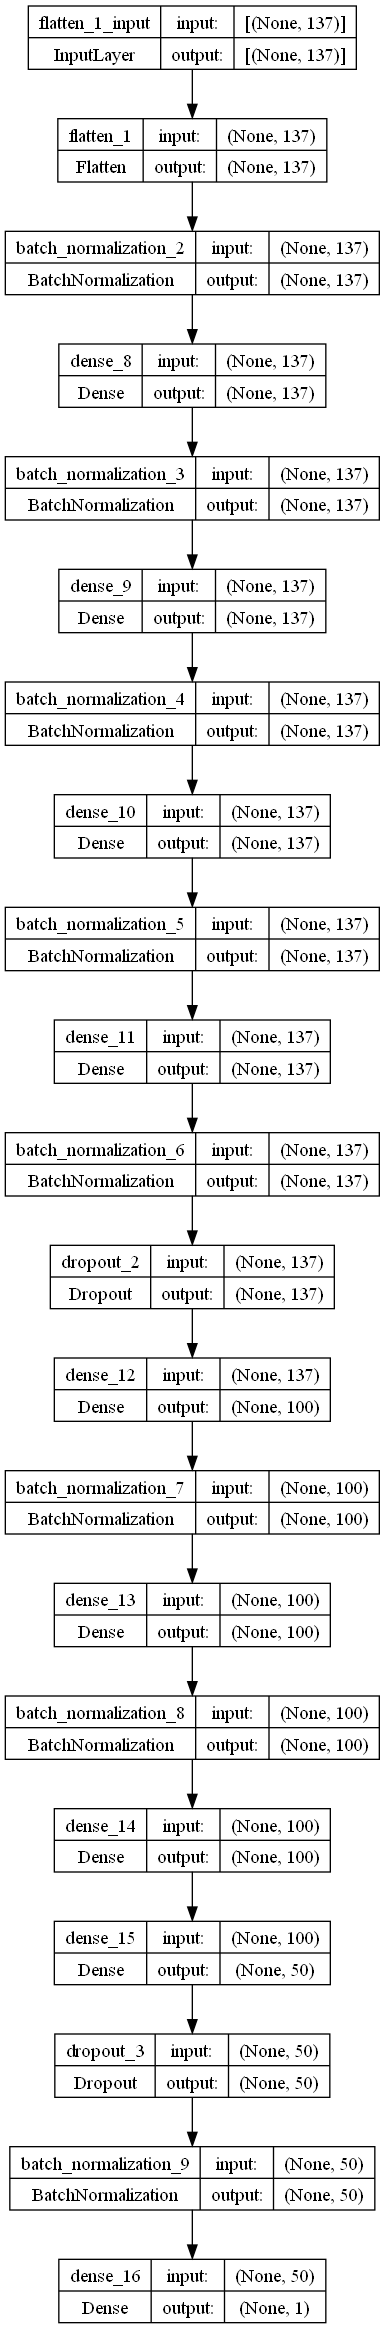

In [28]:
keras.utils.plot_model(model,show_shapes=True)

# Entrenamos el modelo

In [29]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001,clipvalue=100.0)

In [30]:
def total_mae_loss(y_true, y_pred):
    total_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    tf.print(y_true, summarize = -1)
    tf.print(y_pred, summarize = -1)
    return total_loss

In [31]:
def brier_score(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [32]:
model.compile(optimizer= 'Adam',
              loss= 'binary_crossentropy',
              metrics=[brier_score, 'accuracy'])

In [33]:
def scheduler(epoch, lr):
    if epoch < 200:
        return 0.001
    elif epoch >= 200 and epoch <= 1000:
        slope = (0.000001 - 0.001) / (1000 - 200)
        intercept = 0.001 - (slope * 200)
        return slope * epoch + intercept
    else:
        return 0.000001  # Mantener el learning rate en 0.000001 para épocas mayores a 1000 si es necesario

In [34]:
from keras.callbacks import Callback
import keras.backend as K

class CyclicLR(Callback):
    def __init__(self, base_lr=0.0001, max_lr=0.006, step_size=2000., mode='triangular'):
        super(CyclicLR, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

    def clr(self):
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        if self.mode == 'triangular':
            return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x))

    def on_train_begin(self, logs={}):
        logs = logs or {}
        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())

    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1
        K.set_value(self.model.optimizer.lr, self.clr())
        
#    def on_epoch_end(self, epoch, logs=None):
#        # Imprimir el learning rate actual
#        current_lr = K.get_value(self.model.optimizer.lr)
#        print(f"Current Learning Rate at end of epoch {epoch}: {current_lr}")    

In [35]:
class PrintLastBatch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        for batch, (x, y) in enumerate(val_dataset):  # Cambia 'val_dataset' por 'train_dataset' si deseas usar datos de entrenamiento
            pass  # Este bucle se ejecutará hasta el último batch
        
        y_pred = self.model.predict(x)
        
        tf.print("Último y_true de la época:", y, summarize=-1)
        tf.print("Último y_pred de la época:", y_pred, summarize=-1)

In [36]:
val_epochs = 10000

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_accuracy', patience = 1000,verbose = 1, 
                                              restore_best_weights = True)

class_weights = {0: 1, 1: .1}  # asigna más peso a la clase 0

clr = CyclicLR(base_lr=0.0001, max_lr=0.006, step_size=2000., mode='triangular')

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[clr, early_stop],
                    class_weight=class_weights)
#history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop, PrintLastBatch()],
#                   class_weight=class_weights)

Epoch 1/10000
48/48 [==============================] - 6s 92ms/step - loss: 0.1790 - brier_score: 0.2931 - accuracy: 0.4778 - val_loss: 0.7589 - val_brier_score: 0.2828 - val_accuracy: 0.1565
Epoch 2/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1658 - brier_score: 0.2914 - accuracy: 0.4389 - val_loss: 0.8214 - val_brier_score: 0.3134 - val_accuracy: 0.1529
Epoch 3/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1581 - brier_score: 0.3012 - accuracy: 0.3612 - val_loss: 0.8578 - val_brier_score: 0.3305 - val_accuracy: 0.1547
Epoch 4/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1540 - brier_score: 0.3160 - accuracy: 0.2911 - val_loss: 0.8880 - val_brier_score: 0.3420 - val_accuracy: 0.1710
Epoch 5/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1513 - brier_score: 0.3287 - accuracy: 0.2619 - val_loss: 0.8736 - val_brier_score: 0.3368 - val_accuracy: 0.2212
Epoch 6/10000
48/48 [===================

48/48 [==============================] - 4s 92ms/step - loss: 0.1301 - brier_score: 0.2975 - accuracy: 0.4495 - val_loss: 0.8236 - val_brier_score: 0.3080 - val_accuracy: 0.4762
Epoch 44/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1287 - brier_score: 0.2926 - accuracy: 0.4616 - val_loss: 0.9073 - val_brier_score: 0.3423 - val_accuracy: 0.4291
Epoch 45/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1276 - brier_score: 0.2912 - accuracy: 0.4667 - val_loss: 0.8680 - val_brier_score: 0.3250 - val_accuracy: 0.4602
Epoch 46/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1274 - brier_score: 0.2897 - accuracy: 0.4695 - val_loss: 0.8350 - val_brier_score: 0.3137 - val_accuracy: 0.4688
Epoch 47/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1261 - brier_score: 0.2878 - accuracy: 0.4778 - val_loss: 0.8382 - val_brier_score: 0.3145 - val_accuracy: 0.4691
Epoch 48/10000
48/48 [============================

48/48 [==============================] - 4s 91ms/step - loss: 0.0876 - brier_score: 0.2058 - accuracy: 0.6873 - val_loss: 0.6784 - val_brier_score: 0.2373 - val_accuracy: 0.6415
Epoch 86/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0879 - brier_score: 0.2055 - accuracy: 0.6879 - val_loss: 0.7011 - val_brier_score: 0.2455 - val_accuracy: 0.6320
Epoch 87/10000
48/48 [==============================] - 4s 92ms/step - loss: 0.0885 - brier_score: 0.2058 - accuracy: 0.6867 - val_loss: 0.7258 - val_brier_score: 0.2547 - val_accuracy: 0.6217
Epoch 88/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0888 - brier_score: 0.2068 - accuracy: 0.6847 - val_loss: 0.7340 - val_brier_score: 0.2561 - val_accuracy: 0.6242
Epoch 89/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0892 - brier_score: 0.2073 - accuracy: 0.6838 - val_loss: 0.7431 - val_brier_score: 0.2600 - val_accuracy: 0.6188
Epoch 90/10000
48/48 [============================

48/48 [==============================] - 4s 92ms/step - loss: 0.1015 - brier_score: 0.2310 - accuracy: 0.6319 - val_loss: 0.8039 - val_brier_score: 0.2842 - val_accuracy: 0.5746
Epoch 128/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1009 - brier_score: 0.2290 - accuracy: 0.6345 - val_loss: 0.7899 - val_brier_score: 0.2748 - val_accuracy: 0.5944
Epoch 129/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.1004 - brier_score: 0.2276 - accuracy: 0.6388 - val_loss: 0.7820 - val_brier_score: 0.2699 - val_accuracy: 0.6066
Epoch 130/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0999 - brier_score: 0.2270 - accuracy: 0.6397 - val_loss: 0.7824 - val_brier_score: 0.2728 - val_accuracy: 0.5977
Epoch 131/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0996 - brier_score: 0.2261 - accuracy: 0.6415 - val_loss: 0.7753 - val_brier_score: 0.2681 - val_accuracy: 0.6076
Epoch 132/10000
48/48 [=======================

48/48 [==============================] - 4s 91ms/step - loss: 0.0737 - brier_score: 0.1684 - accuracy: 0.7556 - val_loss: 0.6694 - val_brier_score: 0.2191 - val_accuracy: 0.6881
Epoch 170/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0741 - brier_score: 0.1692 - accuracy: 0.7544 - val_loss: 0.6868 - val_brier_score: 0.2254 - val_accuracy: 0.6812
Epoch 171/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0743 - brier_score: 0.1696 - accuracy: 0.7537 - val_loss: 0.6990 - val_brier_score: 0.2281 - val_accuracy: 0.6799
Epoch 172/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0747 - brier_score: 0.1703 - accuracy: 0.7529 - val_loss: 0.7093 - val_brier_score: 0.2307 - val_accuracy: 0.6790
Epoch 173/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0754 - brier_score: 0.1715 - accuracy: 0.7505 - val_loss: 0.7156 - val_brier_score: 0.2347 - val_accuracy: 0.6722
Epoch 174/10000
48/48 [=======================

48/48 [==============================] - 4s 91ms/step - loss: 0.0921 - brier_score: 0.2067 - accuracy: 0.6826 - val_loss: 0.8422 - val_brier_score: 0.2847 - val_accuracy: 0.6025
Epoch 212/10000
48/48 [==============================] - 4s 92ms/step - loss: 0.0917 - brier_score: 0.2059 - accuracy: 0.6847 - val_loss: 0.7984 - val_brier_score: 0.2702 - val_accuracy: 0.6194
Epoch 213/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0904 - brier_score: 0.2035 - accuracy: 0.6903 - val_loss: 0.7745 - val_brier_score: 0.2615 - val_accuracy: 0.6303
Epoch 214/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0906 - brier_score: 0.2038 - accuracy: 0.6886 - val_loss: 0.8187 - val_brier_score: 0.2786 - val_accuracy: 0.6076
Epoch 215/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0896 - brier_score: 0.2015 - accuracy: 0.6935 - val_loss: 0.7760 - val_brier_score: 0.2600 - val_accuracy: 0.6353
Epoch 216/10000
48/48 [=======================

48/48 [==============================] - 4s 90ms/step - loss: 0.0682 - brier_score: 0.1537 - accuracy: 0.7799 - val_loss: 0.6644 - val_brier_score: 0.2092 - val_accuracy: 0.7070
Epoch 254/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0691 - brier_score: 0.1544 - accuracy: 0.7791 - val_loss: 0.6864 - val_brier_score: 0.2183 - val_accuracy: 0.6958
Epoch 255/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0691 - brier_score: 0.1551 - accuracy: 0.7773 - val_loss: 0.6922 - val_brier_score: 0.2191 - val_accuracy: 0.6959
Epoch 256/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0700 - brier_score: 0.1572 - accuracy: 0.7737 - val_loss: 0.7122 - val_brier_score: 0.2277 - val_accuracy: 0.6847
Epoch 257/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0703 - brier_score: 0.1575 - accuracy: 0.7739 - val_loss: 0.7205 - val_brier_score: 0.2305 - val_accuracy: 0.6822
Epoch 258/10000
48/48 [=======================

48/48 [==============================] - 4s 90ms/step - loss: 0.0867 - brier_score: 0.1934 - accuracy: 0.7077 - val_loss: 0.7895 - val_brier_score: 0.2639 - val_accuracy: 0.6310
Epoch 296/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0857 - brier_score: 0.1912 - accuracy: 0.7117 - val_loss: 0.7497 - val_brier_score: 0.2489 - val_accuracy: 0.6505
Epoch 297/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0851 - brier_score: 0.1904 - accuracy: 0.7135 - val_loss: 0.7561 - val_brier_score: 0.2477 - val_accuracy: 0.6560
Epoch 298/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0847 - brier_score: 0.1886 - accuracy: 0.7181 - val_loss: 0.7559 - val_brier_score: 0.2514 - val_accuracy: 0.6480
Epoch 299/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0844 - brier_score: 0.1880 - accuracy: 0.7180 - val_loss: 0.7752 - val_brier_score: 0.2551 - val_accuracy: 0.6486
Epoch 300/10000
48/48 [=======================

48/48 [==============================] - 4s 91ms/step - loss: 0.0652 - brier_score: 0.1459 - accuracy: 0.7927 - val_loss: 0.6771 - val_brier_score: 0.2104 - val_accuracy: 0.7081
Epoch 338/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0654 - brier_score: 0.1449 - accuracy: 0.7936 - val_loss: 0.6978 - val_brier_score: 0.2162 - val_accuracy: 0.7034
Epoch 339/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0663 - brier_score: 0.1466 - accuracy: 0.7900 - val_loss: 0.7031 - val_brier_score: 0.2180 - val_accuracy: 0.7020
Epoch 340/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0671 - brier_score: 0.1491 - accuracy: 0.7871 - val_loss: 0.7126 - val_brier_score: 0.2236 - val_accuracy: 0.6931
Epoch 341/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0664 - brier_score: 0.1471 - accuracy: 0.7892 - val_loss: 0.7152 - val_brier_score: 0.2233 - val_accuracy: 0.6942
Epoch 342/10000
48/48 [=======================

48/48 [==============================] - 4s 90ms/step - loss: 0.0828 - brier_score: 0.1831 - accuracy: 0.7255 - val_loss: 0.7989 - val_brier_score: 0.2640 - val_accuracy: 0.6341
Epoch 380/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0821 - brier_score: 0.1818 - accuracy: 0.7272 - val_loss: 0.7421 - val_brier_score: 0.2424 - val_accuracy: 0.6626
Epoch 381/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0811 - brier_score: 0.1805 - accuracy: 0.7319 - val_loss: 0.7517 - val_brier_score: 0.2477 - val_accuracy: 0.6537
Epoch 382/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0805 - brier_score: 0.1787 - accuracy: 0.7348 - val_loss: 0.7118 - val_brier_score: 0.2336 - val_accuracy: 0.6703
Epoch 383/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0801 - brier_score: 0.1770 - accuracy: 0.7365 - val_loss: 0.7458 - val_brier_score: 0.2462 - val_accuracy: 0.6557
Epoch 384/10000
48/48 [=======================

48/48 [==============================] - 4s 86ms/step - loss: 0.0632 - brier_score: 0.1391 - accuracy: 0.8031 - val_loss: 0.6675 - val_brier_score: 0.2081 - val_accuracy: 0.7118
Epoch 422/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0637 - brier_score: 0.1395 - accuracy: 0.8023 - val_loss: 0.6828 - val_brier_score: 0.2140 - val_accuracy: 0.7030
Epoch 423/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0637 - brier_score: 0.1387 - accuracy: 0.8011 - val_loss: 0.6807 - val_brier_score: 0.2131 - val_accuracy: 0.7055
Epoch 424/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0646 - brier_score: 0.1421 - accuracy: 0.7982 - val_loss: 0.6816 - val_brier_score: 0.2157 - val_accuracy: 0.7002
Epoch 425/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0646 - brier_score: 0.1421 - accuracy: 0.7977 - val_loss: 0.6969 - val_brier_score: 0.2194 - val_accuracy: 0.6977
Epoch 426/10000
48/48 [=======================

48/48 [==============================] - 4s 87ms/step - loss: 0.0789 - brier_score: 0.1741 - accuracy: 0.7427 - val_loss: 0.7165 - val_brier_score: 0.2382 - val_accuracy: 0.6615
Epoch 464/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0789 - brier_score: 0.1750 - accuracy: 0.7407 - val_loss: 0.7342 - val_brier_score: 0.2425 - val_accuracy: 0.6566
Epoch 465/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0786 - brier_score: 0.1730 - accuracy: 0.7444 - val_loss: 0.6977 - val_brier_score: 0.2341 - val_accuracy: 0.6602
Epoch 466/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0774 - brier_score: 0.1713 - accuracy: 0.7477 - val_loss: 0.7298 - val_brier_score: 0.2414 - val_accuracy: 0.6583
Epoch 467/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0773 - brier_score: 0.1706 - accuracy: 0.7475 - val_loss: 0.6790 - val_brier_score: 0.2258 - val_accuracy: 0.6730
Epoch 468/10000
48/48 [=======================

48/48 [==============================] - 4s 89ms/step - loss: 0.0613 - brier_score: 0.1344 - accuracy: 0.8098 - val_loss: 0.6700 - val_brier_score: 0.2060 - val_accuracy: 0.7153
Epoch 506/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0622 - brier_score: 0.1341 - accuracy: 0.8091 - val_loss: 0.6857 - val_brier_score: 0.2119 - val_accuracy: 0.7087
Epoch 507/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0622 - brier_score: 0.1362 - accuracy: 0.8074 - val_loss: 0.6756 - val_brier_score: 0.2094 - val_accuracy: 0.7103
Epoch 508/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0626 - brier_score: 0.1368 - accuracy: 0.8050 - val_loss: 0.6950 - val_brier_score: 0.2180 - val_accuracy: 0.6978
Epoch 509/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0630 - brier_score: 0.1365 - accuracy: 0.8046 - val_loss: 0.6989 - val_brier_score: 0.2209 - val_accuracy: 0.6940
Epoch 510/10000
48/48 [=======================

48/48 [==============================] - 4s 88ms/step - loss: 0.0766 - brier_score: 0.1675 - accuracy: 0.7534 - val_loss: 0.6701 - val_brier_score: 0.2211 - val_accuracy: 0.6825
Epoch 548/10000
48/48 [==============================] - 4s 84ms/step - loss: 0.0763 - brier_score: 0.1677 - accuracy: 0.7551 - val_loss: 0.6680 - val_brier_score: 0.2204 - val_accuracy: 0.6825
Epoch 549/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0781 - brier_score: 0.1719 - accuracy: 0.7484 - val_loss: 0.7303 - val_brier_score: 0.2430 - val_accuracy: 0.6546
Epoch 550/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0754 - brier_score: 0.1662 - accuracy: 0.7580 - val_loss: 0.7607 - val_brier_score: 0.2508 - val_accuracy: 0.6510
Epoch 551/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0749 - brier_score: 0.1636 - accuracy: 0.7597 - val_loss: 0.7749 - val_brier_score: 0.2527 - val_accuracy: 0.6528
Epoch 552/10000
48/48 [=======================

48/48 [==============================] - 4s 85ms/step - loss: 0.0609 - brier_score: 0.1323 - accuracy: 0.8134 - val_loss: 0.6612 - val_brier_score: 0.2033 - val_accuracy: 0.7180
Epoch 590/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0607 - brier_score: 0.1305 - accuracy: 0.8152 - val_loss: 0.6911 - val_brier_score: 0.2122 - val_accuracy: 0.7094
Epoch 591/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0606 - brier_score: 0.1325 - accuracy: 0.8131 - val_loss: 0.6717 - val_brier_score: 0.2057 - val_accuracy: 0.7169
Epoch 592/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0617 - brier_score: 0.1331 - accuracy: 0.8111 - val_loss: 0.6847 - val_brier_score: 0.2140 - val_accuracy: 0.7040
Epoch 593/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0621 - brier_score: 0.1346 - accuracy: 0.8088 - val_loss: 0.6851 - val_brier_score: 0.2131 - val_accuracy: 0.7059
Epoch 594/10000
48/48 [=======================

48/48 [==============================] - 4s 88ms/step - loss: 0.0750 - brier_score: 0.1645 - accuracy: 0.7598 - val_loss: 0.6775 - val_brier_score: 0.2272 - val_accuracy: 0.6685
Epoch 632/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0741 - brier_score: 0.1622 - accuracy: 0.7651 - val_loss: 0.7190 - val_brier_score: 0.2470 - val_accuracy: 0.6346
Epoch 633/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0750 - brier_score: 0.1649 - accuracy: 0.7598 - val_loss: 0.6861 - val_brier_score: 0.2301 - val_accuracy: 0.6661
Epoch 634/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0732 - brier_score: 0.1587 - accuracy: 0.7686 - val_loss: 0.7058 - val_brier_score: 0.2342 - val_accuracy: 0.6673
Epoch 635/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0725 - brier_score: 0.1582 - accuracy: 0.7692 - val_loss: 0.7241 - val_brier_score: 0.2367 - val_accuracy: 0.6703
Epoch 636/10000
48/48 [=======================

48/48 [==============================] - 4s 88ms/step - loss: 0.0596 - brier_score: 0.1288 - accuracy: 0.8192 - val_loss: 0.6866 - val_brier_score: 0.2089 - val_accuracy: 0.7157
Epoch 674/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0603 - brier_score: 0.1303 - accuracy: 0.8166 - val_loss: 0.6774 - val_brier_score: 0.2106 - val_accuracy: 0.7083
Epoch 675/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0610 - brier_score: 0.1300 - accuracy: 0.8162 - val_loss: 0.6987 - val_brier_score: 0.2195 - val_accuracy: 0.6977
Epoch 676/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0604 - brier_score: 0.1310 - accuracy: 0.8149 - val_loss: 0.6809 - val_brier_score: 0.2116 - val_accuracy: 0.7083
Epoch 677/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0609 - brier_score: 0.1315 - accuracy: 0.8136 - val_loss: 0.6789 - val_brier_score: 0.2094 - val_accuracy: 0.7129
Epoch 678/10000
48/48 [=======================

48/48 [==============================] - 4s 87ms/step - loss: 0.0730 - brier_score: 0.1601 - accuracy: 0.7668 - val_loss: 0.6959 - val_brier_score: 0.2277 - val_accuracy: 0.6782
Epoch 716/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0729 - brier_score: 0.1581 - accuracy: 0.7690 - val_loss: 0.6757 - val_brier_score: 0.2204 - val_accuracy: 0.6878
Epoch 717/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0720 - brier_score: 0.1557 - accuracy: 0.7727 - val_loss: 0.6804 - val_brier_score: 0.2218 - val_accuracy: 0.6865
Epoch 718/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0722 - brier_score: 0.1582 - accuracy: 0.7709 - val_loss: 0.6565 - val_brier_score: 0.2129 - val_accuracy: 0.6966
Epoch 719/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0719 - brier_score: 0.1566 - accuracy: 0.7734 - val_loss: 0.6550 - val_brier_score: 0.2166 - val_accuracy: 0.6864
Epoch 720/10000
48/48 [=======================

48/48 [==============================] - 4s 92ms/step - loss: 0.0591 - brier_score: 0.1269 - accuracy: 0.8215 - val_loss: 0.6794 - val_brier_score: 0.2077 - val_accuracy: 0.7161
Epoch 758/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0595 - brier_score: 0.1278 - accuracy: 0.8194 - val_loss: 0.6864 - val_brier_score: 0.2106 - val_accuracy: 0.7122
Epoch 759/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0596 - brier_score: 0.1289 - accuracy: 0.8189 - val_loss: 0.6826 - val_brier_score: 0.2081 - val_accuracy: 0.7152
Epoch 760/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0594 - brier_score: 0.1276 - accuracy: 0.8198 - val_loss: 0.6618 - val_brier_score: 0.2021 - val_accuracy: 0.7217
Epoch 761/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0603 - brier_score: 0.1292 - accuracy: 0.8170 - val_loss: 0.6679 - val_brier_score: 0.2059 - val_accuracy: 0.7148
Epoch 762/10000
48/48 [=======================

48/48 [==============================] - 4s 88ms/step - loss: 0.0713 - brier_score: 0.1551 - accuracy: 0.7760 - val_loss: 0.6595 - val_brier_score: 0.2160 - val_accuracy: 0.6909
Epoch 800/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0717 - brier_score: 0.1545 - accuracy: 0.7758 - val_loss: 0.6503 - val_brier_score: 0.2065 - val_accuracy: 0.7101
Epoch 801/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0704 - brier_score: 0.1533 - accuracy: 0.7794 - val_loss: 0.6562 - val_brier_score: 0.2168 - val_accuracy: 0.6862
Epoch 802/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0702 - brier_score: 0.1514 - accuracy: 0.7805 - val_loss: 0.6990 - val_brier_score: 0.2320 - val_accuracy: 0.6709
Epoch 803/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0698 - brier_score: 0.1525 - accuracy: 0.7807 - val_loss: 0.6624 - val_brier_score: 0.2185 - val_accuracy: 0.6855
Epoch 804/10000
48/48 [=======================

48/48 [==============================] - 4s 86ms/step - loss: 0.0582 - brier_score: 0.1246 - accuracy: 0.8257 - val_loss: 0.6766 - val_brier_score: 0.2031 - val_accuracy: 0.7234
Epoch 842/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0582 - brier_score: 0.1244 - accuracy: 0.8251 - val_loss: 0.6937 - val_brier_score: 0.2100 - val_accuracy: 0.7152
Epoch 843/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0593 - brier_score: 0.1271 - accuracy: 0.8210 - val_loss: 0.6994 - val_brier_score: 0.2163 - val_accuracy: 0.7034
Epoch 844/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0598 - brier_score: 0.1280 - accuracy: 0.8193 - val_loss: 0.6819 - val_brier_score: 0.2108 - val_accuracy: 0.7100
Epoch 845/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0602 - brier_score: 0.1280 - accuracy: 0.8201 - val_loss: 0.7239 - val_brier_score: 0.2264 - val_accuracy: 0.6912
Epoch 846/10000
48/48 [=======================

48/48 [==============================] - 4s 87ms/step - loss: 0.0704 - brier_score: 0.1523 - accuracy: 0.7806 - val_loss: 0.6365 - val_brier_score: 0.2081 - val_accuracy: 0.6998
Epoch 884/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0700 - brier_score: 0.1527 - accuracy: 0.7826 - val_loss: 0.6401 - val_brier_score: 0.2093 - val_accuracy: 0.6981
Epoch 885/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0695 - brier_score: 0.1494 - accuracy: 0.7845 - val_loss: 0.6628 - val_brier_score: 0.2184 - val_accuracy: 0.6868
Epoch 886/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0690 - brier_score: 0.1488 - accuracy: 0.7865 - val_loss: 0.6589 - val_brier_score: 0.2174 - val_accuracy: 0.6890
Epoch 887/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0681 - brier_score: 0.1482 - accuracy: 0.7878 - val_loss: 0.6847 - val_brier_score: 0.2264 - val_accuracy: 0.6766
Epoch 888/10000
48/48 [=======================

48/48 [==============================] - 4s 88ms/step - loss: 0.0578 - brier_score: 0.1222 - accuracy: 0.8278 - val_loss: 0.6807 - val_brier_score: 0.2057 - val_accuracy: 0.7205
Epoch 926/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0582 - brier_score: 0.1245 - accuracy: 0.8251 - val_loss: 0.6901 - val_brier_score: 0.2101 - val_accuracy: 0.7147
Epoch 927/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0582 - brier_score: 0.1254 - accuracy: 0.8248 - val_loss: 0.6934 - val_brier_score: 0.2116 - val_accuracy: 0.7128
Epoch 928/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0591 - brier_score: 0.1247 - accuracy: 0.8236 - val_loss: 0.6967 - val_brier_score: 0.2148 - val_accuracy: 0.7073
Epoch 929/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0591 - brier_score: 0.1272 - accuracy: 0.8203 - val_loss: 0.6918 - val_brier_score: 0.2130 - val_accuracy: 0.7092
Epoch 930/10000
48/48 [=======================

48/48 [==============================] - 4s 86ms/step - loss: 0.0681 - brier_score: 0.1476 - accuracy: 0.7885 - val_loss: 0.6878 - val_brier_score: 0.2219 - val_accuracy: 0.6891
Epoch 968/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0682 - brier_score: 0.1471 - accuracy: 0.7876 - val_loss: 0.6977 - val_brier_score: 0.2248 - val_accuracy: 0.6863
Epoch 969/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0680 - brier_score: 0.1474 - accuracy: 0.7891 - val_loss: 0.7076 - val_brier_score: 0.2330 - val_accuracy: 0.6708
Epoch 970/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0673 - brier_score: 0.1449 - accuracy: 0.7916 - val_loss: 0.6925 - val_brier_score: 0.2267 - val_accuracy: 0.6807
Epoch 971/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0673 - brier_score: 0.1451 - accuracy: 0.7924 - val_loss: 0.6803 - val_brier_score: 0.2238 - val_accuracy: 0.6810
Epoch 972/10000
48/48 [=======================

48/48 [==============================] - 4s 87ms/step - loss: 0.0575 - brier_score: 0.1223 - accuracy: 0.8280 - val_loss: 0.6757 - val_brier_score: 0.2049 - val_accuracy: 0.7211
Epoch 1010/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0574 - brier_score: 0.1230 - accuracy: 0.8277 - val_loss: 0.6815 - val_brier_score: 0.2073 - val_accuracy: 0.7175
Epoch 1011/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0582 - brier_score: 0.1242 - accuracy: 0.8260 - val_loss: 0.6868 - val_brier_score: 0.2093 - val_accuracy: 0.7153
Epoch 1012/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0586 - brier_score: 0.1239 - accuracy: 0.8257 - val_loss: 0.7090 - val_brier_score: 0.2203 - val_accuracy: 0.6996
Epoch 1013/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0585 - brier_score: 0.1250 - accuracy: 0.8239 - val_loss: 0.7023 - val_brier_score: 0.2155 - val_accuracy: 0.7076
Epoch 1014/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0679 - brier_score: 0.1469 - accuracy: 0.7904 - val_loss: 0.7068 - val_brier_score: 0.2310 - val_accuracy: 0.6761
Epoch 1052/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0675 - brier_score: 0.1447 - accuracy: 0.7926 - val_loss: 0.7092 - val_brier_score: 0.2316 - val_accuracy: 0.6743
Epoch 1053/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0668 - brier_score: 0.1440 - accuracy: 0.7931 - val_loss: 0.7018 - val_brier_score: 0.2258 - val_accuracy: 0.6863
Epoch 1054/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0658 - brier_score: 0.1411 - accuracy: 0.7982 - val_loss: 0.7291 - val_brier_score: 0.2379 - val_accuracy: 0.6690
Epoch 1055/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0656 - brier_score: 0.1411 - accuracy: 0.7970 - val_loss: 0.6983 - val_brier_score: 0.2236 - val_accuracy: 0.6899
Epoch 1056/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0573 - brier_score: 0.1211 - accuracy: 0.8294 - val_loss: 0.6878 - val_brier_score: 0.2087 - val_accuracy: 0.7174
Epoch 1094/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0570 - brier_score: 0.1215 - accuracy: 0.8299 - val_loss: 0.6909 - val_brier_score: 0.2086 - val_accuracy: 0.7183
Epoch 1095/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0578 - brier_score: 0.1226 - accuracy: 0.8275 - val_loss: 0.6776 - val_brier_score: 0.2063 - val_accuracy: 0.7198
Epoch 1096/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0582 - brier_score: 0.1239 - accuracy: 0.8260 - val_loss: 0.6941 - val_brier_score: 0.2146 - val_accuracy: 0.7069
Epoch 1097/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0585 - brier_score: 0.1245 - accuracy: 0.8251 - val_loss: 0.6887 - val_brier_score: 0.2137 - val_accuracy: 0.7076
Epoch 1098/10000
48/48 [==================

48/48 [==============================] - 4s 88ms/step - loss: 0.0663 - brier_score: 0.1428 - accuracy: 0.7945 - val_loss: 0.7344 - val_brier_score: 0.2339 - val_accuracy: 0.6802
Epoch 1136/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0662 - brier_score: 0.1414 - accuracy: 0.7962 - val_loss: 0.7238 - val_brier_score: 0.2358 - val_accuracy: 0.6715
Epoch 1137/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0654 - brier_score: 0.1418 - accuracy: 0.7991 - val_loss: 0.6731 - val_brier_score: 0.2144 - val_accuracy: 0.7000
Epoch 1138/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0652 - brier_score: 0.1397 - accuracy: 0.8014 - val_loss: 0.7013 - val_brier_score: 0.2256 - val_accuracy: 0.6866
Epoch 1139/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0651 - brier_score: 0.1388 - accuracy: 0.8011 - val_loss: 0.6893 - val_brier_score: 0.2207 - val_accuracy: 0.6928
Epoch 1140/10000
48/48 [==================

48/48 [==============================] - 4s 85ms/step - loss: 0.0564 - brier_score: 0.1210 - accuracy: 0.8312 - val_loss: 0.6868 - val_brier_score: 0.2050 - val_accuracy: 0.7240
Epoch 1178/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0569 - brier_score: 0.1206 - accuracy: 0.8312 - val_loss: 0.7000 - val_brier_score: 0.2096 - val_accuracy: 0.7177
Epoch 1179/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0572 - brier_score: 0.1216 - accuracy: 0.8298 - val_loss: 0.6977 - val_brier_score: 0.2098 - val_accuracy: 0.7169
Epoch 1180/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0578 - brier_score: 0.1222 - accuracy: 0.8281 - val_loss: 0.6967 - val_brier_score: 0.2108 - val_accuracy: 0.7159
Epoch 1181/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0579 - brier_score: 0.1230 - accuracy: 0.8268 - val_loss: 0.6904 - val_brier_score: 0.2089 - val_accuracy: 0.7181
Epoch 1182/10000
48/48 [==================

48/48 [==============================] - 4s 90ms/step - loss: 0.0659 - brier_score: 0.1416 - accuracy: 0.7978 - val_loss: 0.6443 - val_brier_score: 0.2125 - val_accuracy: 0.6909
Epoch 1220/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0656 - brier_score: 0.1404 - accuracy: 0.7999 - val_loss: 0.6508 - val_brier_score: 0.2115 - val_accuracy: 0.6974
Epoch 1221/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0653 - brier_score: 0.1405 - accuracy: 0.8002 - val_loss: 0.6700 - val_brier_score: 0.2166 - val_accuracy: 0.6946
Epoch 1222/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0649 - brier_score: 0.1390 - accuracy: 0.8023 - val_loss: 0.7268 - val_brier_score: 0.2335 - val_accuracy: 0.6776
Epoch 1223/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0640 - brier_score: 0.1375 - accuracy: 0.8049 - val_loss: 0.7157 - val_brier_score: 0.2250 - val_accuracy: 0.6923
Epoch 1224/10000
48/48 [==================

48/48 [==============================] - 4s 90ms/step - loss: 0.0564 - brier_score: 0.1185 - accuracy: 0.8341 - val_loss: 0.7140 - val_brier_score: 0.2150 - val_accuracy: 0.7116
Epoch 1262/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0578 - brier_score: 0.1225 - accuracy: 0.8294 - val_loss: 0.7165 - val_brier_score: 0.2198 - val_accuracy: 0.7035
Epoch 1263/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0578 - brier_score: 0.1226 - accuracy: 0.8279 - val_loss: 0.6917 - val_brier_score: 0.2113 - val_accuracy: 0.7133
Epoch 1264/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0573 - brier_score: 0.1222 - accuracy: 0.8289 - val_loss: 0.6923 - val_brier_score: 0.2106 - val_accuracy: 0.7144
Epoch 1265/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0578 - brier_score: 0.1223 - accuracy: 0.8275 - val_loss: 0.6782 - val_brier_score: 0.2069 - val_accuracy: 0.7181
Epoch 1266/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0650 - brier_score: 0.1388 - accuracy: 0.8014 - val_loss: 0.7091 - val_brier_score: 0.2284 - val_accuracy: 0.6814
Epoch 1304/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0649 - brier_score: 0.1378 - accuracy: 0.8017 - val_loss: 0.6840 - val_brier_score: 0.2182 - val_accuracy: 0.6955
Epoch 1305/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0640 - brier_score: 0.1370 - accuracy: 0.8051 - val_loss: 0.6690 - val_brier_score: 0.2132 - val_accuracy: 0.7021
Epoch 1306/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0636 - brier_score: 0.1363 - accuracy: 0.8070 - val_loss: 0.6533 - val_brier_score: 0.2057 - val_accuracy: 0.7116
Epoch 1307/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0638 - brier_score: 0.1355 - accuracy: 0.8083 - val_loss: 0.6587 - val_brier_score: 0.2116 - val_accuracy: 0.7022
Epoch 1308/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0570 - brier_score: 0.1220 - accuracy: 0.8308 - val_loss: 0.6812 - val_brier_score: 0.2052 - val_accuracy: 0.7230
Epoch 1346/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0565 - brier_score: 0.1192 - accuracy: 0.8328 - val_loss: 0.7063 - val_brier_score: 0.2119 - val_accuracy: 0.7160
Epoch 1347/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0570 - brier_score: 0.1212 - accuracy: 0.8303 - val_loss: 0.7028 - val_brier_score: 0.2159 - val_accuracy: 0.7071
Epoch 1348/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0573 - brier_score: 0.1214 - accuracy: 0.8292 - val_loss: 0.6936 - val_brier_score: 0.2087 - val_accuracy: 0.7176
Epoch 1349/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0579 - brier_score: 0.1233 - accuracy: 0.8272 - val_loss: 0.6855 - val_brier_score: 0.2094 - val_accuracy: 0.7157
Epoch 1350/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0639 - brier_score: 0.1356 - accuracy: 0.8070 - val_loss: 0.6901 - val_brier_score: 0.2184 - val_accuracy: 0.6986
Epoch 1388/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0631 - brier_score: 0.1353 - accuracy: 0.8083 - val_loss: 0.7083 - val_brier_score: 0.2247 - val_accuracy: 0.6911
Epoch 1389/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0634 - brier_score: 0.1357 - accuracy: 0.8081 - val_loss: 0.7427 - val_brier_score: 0.2392 - val_accuracy: 0.6719
Epoch 1390/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0629 - brier_score: 0.1336 - accuracy: 0.8095 - val_loss: 0.6979 - val_brier_score: 0.2217 - val_accuracy: 0.6936
Epoch 1391/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0630 - brier_score: 0.1344 - accuracy: 0.8091 - val_loss: 0.7180 - val_brier_score: 0.2293 - val_accuracy: 0.6838
Epoch 1392/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0564 - brier_score: 0.1188 - accuracy: 0.8331 - val_loss: 0.6913 - val_brier_score: 0.2088 - val_accuracy: 0.7180
Epoch 1430/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0563 - brier_score: 0.1196 - accuracy: 0.8327 - val_loss: 0.6942 - val_brier_score: 0.2101 - val_accuracy: 0.7157
Epoch 1431/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0566 - brier_score: 0.1200 - accuracy: 0.8323 - val_loss: 0.7043 - val_brier_score: 0.2134 - val_accuracy: 0.7120
Epoch 1432/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0581 - brier_score: 0.1218 - accuracy: 0.8291 - val_loss: 0.7132 - val_brier_score: 0.2172 - val_accuracy: 0.7085
Epoch 1433/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0577 - brier_score: 0.1222 - accuracy: 0.8275 - val_loss: 0.6879 - val_brier_score: 0.2103 - val_accuracy: 0.7156
Epoch 1434/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0639 - brier_score: 0.1361 - accuracy: 0.8066 - val_loss: 0.6745 - val_brier_score: 0.2160 - val_accuracy: 0.6981
Epoch 1472/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0630 - brier_score: 0.1360 - accuracy: 0.8091 - val_loss: 0.6989 - val_brier_score: 0.2255 - val_accuracy: 0.6855
Epoch 1473/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0636 - brier_score: 0.1353 - accuracy: 0.8085 - val_loss: 0.6966 - val_brier_score: 0.2248 - val_accuracy: 0.6866
Epoch 1474/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0626 - brier_score: 0.1334 - accuracy: 0.8119 - val_loss: 0.7126 - val_brier_score: 0.2239 - val_accuracy: 0.6954
Epoch 1475/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0622 - brier_score: 0.1315 - accuracy: 0.8138 - val_loss: 0.7080 - val_brier_score: 0.2231 - val_accuracy: 0.6949
Epoch 1476/10000
48/48 [==================

48/48 [==============================] - 4s 88ms/step - loss: 0.0568 - brier_score: 0.1195 - accuracy: 0.8338 - val_loss: 0.6998 - val_brier_score: 0.2121 - val_accuracy: 0.7140
Epoch 1514/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0563 - brier_score: 0.1183 - accuracy: 0.8338 - val_loss: 0.6747 - val_brier_score: 0.2051 - val_accuracy: 0.7216
Epoch 1515/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0574 - brier_score: 0.1211 - accuracy: 0.8293 - val_loss: 0.6901 - val_brier_score: 0.2139 - val_accuracy: 0.7072
Epoch 1516/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0572 - brier_score: 0.1211 - accuracy: 0.8306 - val_loss: 0.6814 - val_brier_score: 0.2079 - val_accuracy: 0.7183
Epoch 1517/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0570 - brier_score: 0.1212 - accuracy: 0.8311 - val_loss: 0.7043 - val_brier_score: 0.2134 - val_accuracy: 0.7137
Epoch 1518/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0626 - brier_score: 0.1331 - accuracy: 0.8115 - val_loss: 0.7471 - val_brier_score: 0.2348 - val_accuracy: 0.6840
Epoch 1556/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0634 - brier_score: 0.1341 - accuracy: 0.8096 - val_loss: 0.7498 - val_brier_score: 0.2368 - val_accuracy: 0.6803
Epoch 1557/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0620 - brier_score: 0.1324 - accuracy: 0.8121 - val_loss: 0.6868 - val_brier_score: 0.2157 - val_accuracy: 0.7025
Epoch 1558/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0614 - brier_score: 0.1306 - accuracy: 0.8145 - val_loss: 0.7163 - val_brier_score: 0.2249 - val_accuracy: 0.6930
Epoch 1559/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0615 - brier_score: 0.1316 - accuracy: 0.8149 - val_loss: 0.7110 - val_brier_score: 0.2265 - val_accuracy: 0.6878
Epoch 1560/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0557 - brier_score: 0.1166 - accuracy: 0.8366 - val_loss: 0.6895 - val_brier_score: 0.2080 - val_accuracy: 0.7191
Epoch 1598/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0568 - brier_score: 0.1199 - accuracy: 0.8323 - val_loss: 0.6835 - val_brier_score: 0.2089 - val_accuracy: 0.7164
Epoch 1599/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0569 - brier_score: 0.1207 - accuracy: 0.8322 - val_loss: 0.6943 - val_brier_score: 0.2094 - val_accuracy: 0.7188
Epoch 1600/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0573 - brier_score: 0.1199 - accuracy: 0.8325 - val_loss: 0.7348 - val_brier_score: 0.2237 - val_accuracy: 0.7017
Epoch 1601/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0574 - brier_score: 0.1214 - accuracy: 0.8290 - val_loss: 0.6699 - val_brier_score: 0.2063 - val_accuracy: 0.7185
Epoch 1602/10000
48/48 [==================

48/48 [==============================] - 4s 85ms/step - loss: 0.0617 - brier_score: 0.1298 - accuracy: 0.8159 - val_loss: 0.7213 - val_brier_score: 0.2239 - val_accuracy: 0.6965
Epoch 1640/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0613 - brier_score: 0.1309 - accuracy: 0.8159 - val_loss: 0.7202 - val_brier_score: 0.2246 - val_accuracy: 0.6941
Epoch 1641/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0607 - brier_score: 0.1280 - accuracy: 0.8193 - val_loss: 0.7318 - val_brier_score: 0.2245 - val_accuracy: 0.6994
Epoch 1642/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0610 - brier_score: 0.1294 - accuracy: 0.8167 - val_loss: 0.7295 - val_brier_score: 0.2243 - val_accuracy: 0.6985
Epoch 1643/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0614 - brier_score: 0.1299 - accuracy: 0.8165 - val_loss: 0.7188 - val_brier_score: 0.2263 - val_accuracy: 0.6913
Epoch 1644/10000
48/48 [==================

48/48 [==============================] - 4s 88ms/step - loss: 0.0553 - brier_score: 0.1162 - accuracy: 0.8380 - val_loss: 0.6928 - val_brier_score: 0.2066 - val_accuracy: 0.7234
Epoch 1682/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0559 - brier_score: 0.1181 - accuracy: 0.8361 - val_loss: 0.7005 - val_brier_score: 0.2100 - val_accuracy: 0.7185
Epoch 1683/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0569 - brier_score: 0.1191 - accuracy: 0.8331 - val_loss: 0.7129 - val_brier_score: 0.2166 - val_accuracy: 0.7085
Epoch 1684/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0566 - brier_score: 0.1199 - accuracy: 0.8326 - val_loss: 0.7355 - val_brier_score: 0.2233 - val_accuracy: 0.7023
Epoch 1685/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0570 - brier_score: 0.1208 - accuracy: 0.8320 - val_loss: 0.7275 - val_brier_score: 0.2189 - val_accuracy: 0.7082
Epoch 1686/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0609 - brier_score: 0.1295 - accuracy: 0.8161 - val_loss: 0.7274 - val_brier_score: 0.2284 - val_accuracy: 0.6900
Epoch 1724/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0605 - brier_score: 0.1284 - accuracy: 0.8186 - val_loss: 0.7240 - val_brier_score: 0.2228 - val_accuracy: 0.6999
Epoch 1725/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0608 - brier_score: 0.1285 - accuracy: 0.8178 - val_loss: 0.6958 - val_brier_score: 0.2200 - val_accuracy: 0.6961
Epoch 1726/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0605 - brier_score: 0.1286 - accuracy: 0.8187 - val_loss: 0.6849 - val_brier_score: 0.2126 - val_accuracy: 0.7097
Epoch 1727/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0605 - brier_score: 0.1273 - accuracy: 0.8201 - val_loss: 0.7415 - val_brier_score: 0.2369 - val_accuracy: 0.6748
Epoch 1728/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0556 - brier_score: 0.1186 - accuracy: 0.8352 - val_loss: 0.6878 - val_brier_score: 0.2090 - val_accuracy: 0.7155
Epoch 1766/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0567 - brier_score: 0.1182 - accuracy: 0.8346 - val_loss: 0.7168 - val_brier_score: 0.2169 - val_accuracy: 0.7092
Epoch 1767/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0563 - brier_score: 0.1189 - accuracy: 0.8342 - val_loss: 0.6953 - val_brier_score: 0.2120 - val_accuracy: 0.7125
Epoch 1768/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0564 - brier_score: 0.1182 - accuracy: 0.8340 - val_loss: 0.6849 - val_brier_score: 0.2070 - val_accuracy: 0.7198
Epoch 1769/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0568 - brier_score: 0.1201 - accuracy: 0.8316 - val_loss: 0.6929 - val_brier_score: 0.2107 - val_accuracy: 0.7137
Epoch 1770/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0606 - brier_score: 0.1282 - accuracy: 0.8199 - val_loss: 0.7321 - val_brier_score: 0.2246 - val_accuracy: 0.6979
Epoch 1808/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0598 - brier_score: 0.1274 - accuracy: 0.8209 - val_loss: 0.7136 - val_brier_score: 0.2186 - val_accuracy: 0.7049
Epoch 1809/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0597 - brier_score: 0.1271 - accuracy: 0.8214 - val_loss: 0.6996 - val_brier_score: 0.2166 - val_accuracy: 0.7053
Epoch 1810/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0597 - brier_score: 0.1267 - accuracy: 0.8216 - val_loss: 0.7097 - val_brier_score: 0.2185 - val_accuracy: 0.7052
Epoch 1811/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0594 - brier_score: 0.1261 - accuracy: 0.8230 - val_loss: 0.7258 - val_brier_score: 0.2240 - val_accuracy: 0.6969
Epoch 1812/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0560 - brier_score: 0.1168 - accuracy: 0.8365 - val_loss: 0.6997 - val_brier_score: 0.2113 - val_accuracy: 0.7159
Epoch 1850/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0558 - brier_score: 0.1184 - accuracy: 0.8357 - val_loss: 0.6966 - val_brier_score: 0.2085 - val_accuracy: 0.7206
Epoch 1851/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0566 - brier_score: 0.1185 - accuracy: 0.8341 - val_loss: 0.7532 - val_brier_score: 0.2240 - val_accuracy: 0.7055
Epoch 1852/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0565 - brier_score: 0.1193 - accuracy: 0.8336 - val_loss: 0.7049 - val_brier_score: 0.2138 - val_accuracy: 0.7129
Epoch 1853/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0567 - brier_score: 0.1189 - accuracy: 0.8336 - val_loss: 0.7305 - val_brier_score: 0.2185 - val_accuracy: 0.7108
Epoch 1854/10000
48/48 [==================

48/48 [==============================] - 4s 88ms/step - loss: 0.0601 - brier_score: 0.1268 - accuracy: 0.8214 - val_loss: 0.7044 - val_brier_score: 0.2209 - val_accuracy: 0.6989
Epoch 1892/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0601 - brier_score: 0.1274 - accuracy: 0.8208 - val_loss: 0.6896 - val_brier_score: 0.2189 - val_accuracy: 0.6979
Epoch 1893/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0596 - brier_score: 0.1271 - accuracy: 0.8217 - val_loss: 0.6772 - val_brier_score: 0.2121 - val_accuracy: 0.7084
Epoch 1894/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0592 - brier_score: 0.1259 - accuracy: 0.8240 - val_loss: 0.6840 - val_brier_score: 0.2154 - val_accuracy: 0.7030
Epoch 1895/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0587 - brier_score: 0.1245 - accuracy: 0.8259 - val_loss: 0.7183 - val_brier_score: 0.2152 - val_accuracy: 0.7134
Epoch 1896/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0561 - brier_score: 0.1174 - accuracy: 0.8358 - val_loss: 0.6977 - val_brier_score: 0.2094 - val_accuracy: 0.7204
Epoch 1934/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0561 - brier_score: 0.1178 - accuracy: 0.8355 - val_loss: 0.6917 - val_brier_score: 0.2102 - val_accuracy: 0.7166
Epoch 1935/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0563 - brier_score: 0.1176 - accuracy: 0.8350 - val_loss: 0.7036 - val_brier_score: 0.2145 - val_accuracy: 0.7109
Epoch 1936/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0568 - brier_score: 0.1205 - accuracy: 0.8320 - val_loss: 0.7080 - val_brier_score: 0.2154 - val_accuracy: 0.7103
Epoch 1937/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0572 - brier_score: 0.1206 - accuracy: 0.8320 - val_loss: 0.6873 - val_brier_score: 0.2091 - val_accuracy: 0.7166
Epoch 1938/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0598 - brier_score: 0.1270 - accuracy: 0.8228 - val_loss: 0.6785 - val_brier_score: 0.2112 - val_accuracy: 0.7110
Epoch 1976/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0592 - brier_score: 0.1251 - accuracy: 0.8250 - val_loss: 0.7150 - val_brier_score: 0.2191 - val_accuracy: 0.7055
Epoch 1977/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0593 - brier_score: 0.1248 - accuracy: 0.8238 - val_loss: 0.7238 - val_brier_score: 0.2223 - val_accuracy: 0.7026
Epoch 1978/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0588 - brier_score: 0.1235 - accuracy: 0.8260 - val_loss: 0.7088 - val_brier_score: 0.2168 - val_accuracy: 0.7088
Epoch 1979/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0585 - brier_score: 0.1238 - accuracy: 0.8260 - val_loss: 0.6922 - val_brier_score: 0.2120 - val_accuracy: 0.7130
Epoch 1980/10000
48/48 [==================

48/48 [==============================] - 4s 88ms/step - loss: 0.0558 - brier_score: 0.1172 - accuracy: 0.8373 - val_loss: 0.6995 - val_brier_score: 0.2118 - val_accuracy: 0.7151
Epoch 2018/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0557 - brier_score: 0.1171 - accuracy: 0.8364 - val_loss: 0.7115 - val_brier_score: 0.2115 - val_accuracy: 0.7190
Epoch 2019/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0565 - brier_score: 0.1177 - accuracy: 0.8345 - val_loss: 0.7169 - val_brier_score: 0.2153 - val_accuracy: 0.7131
Epoch 2020/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0577 - brier_score: 0.1210 - accuracy: 0.8324 - val_loss: 0.7007 - val_brier_score: 0.2178 - val_accuracy: 0.7045
Epoch 2021/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0575 - brier_score: 0.1213 - accuracy: 0.8301 - val_loss: 0.7582 - val_brier_score: 0.2240 - val_accuracy: 0.7074
Epoch 2022/10000
48/48 [==================

48/48 [==============================] - 4s 88ms/step - loss: 0.0595 - brier_score: 0.1266 - accuracy: 0.8223 - val_loss: 0.7184 - val_brier_score: 0.2231 - val_accuracy: 0.6986
Epoch 2060/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0587 - brier_score: 0.1237 - accuracy: 0.8253 - val_loss: 0.7241 - val_brier_score: 0.2232 - val_accuracy: 0.7000
Epoch 2061/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0589 - brier_score: 0.1239 - accuracy: 0.8264 - val_loss: 0.7081 - val_brier_score: 0.2206 - val_accuracy: 0.7005
Epoch 2062/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0579 - brier_score: 0.1223 - accuracy: 0.8283 - val_loss: 0.7151 - val_brier_score: 0.2203 - val_accuracy: 0.7028
Epoch 2063/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0580 - brier_score: 0.1218 - accuracy: 0.8289 - val_loss: 0.7236 - val_brier_score: 0.2199 - val_accuracy: 0.7068
Epoch 2064/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0556 - brier_score: 0.1170 - accuracy: 0.8368 - val_loss: 0.6877 - val_brier_score: 0.2109 - val_accuracy: 0.7145
Epoch 2102/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0565 - brier_score: 0.1178 - accuracy: 0.8352 - val_loss: 0.6816 - val_brier_score: 0.2075 - val_accuracy: 0.7192
Epoch 2103/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0555 - brier_score: 0.1161 - accuracy: 0.8376 - val_loss: 0.6991 - val_brier_score: 0.2113 - val_accuracy: 0.7158
Epoch 2104/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0567 - brier_score: 0.1193 - accuracy: 0.8333 - val_loss: 0.6753 - val_brier_score: 0.2061 - val_accuracy: 0.7197
Epoch 2105/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0568 - brier_score: 0.1189 - accuracy: 0.8336 - val_loss: 0.7255 - val_brier_score: 0.2199 - val_accuracy: 0.7069
Epoch 2106/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0583 - brier_score: 0.1232 - accuracy: 0.8267 - val_loss: 0.7039 - val_brier_score: 0.2182 - val_accuracy: 0.7042
Epoch 2144/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0588 - brier_score: 0.1232 - accuracy: 0.8263 - val_loss: 0.6986 - val_brier_score: 0.2163 - val_accuracy: 0.7061
Epoch 2145/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0586 - brier_score: 0.1236 - accuracy: 0.8267 - val_loss: 0.7008 - val_brier_score: 0.2145 - val_accuracy: 0.7103
Epoch 2146/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0579 - brier_score: 0.1225 - accuracy: 0.8289 - val_loss: 0.6851 - val_brier_score: 0.2114 - val_accuracy: 0.7121
Epoch 2147/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0578 - brier_score: 0.1208 - accuracy: 0.8312 - val_loss: 0.7168 - val_brier_score: 0.2201 - val_accuracy: 0.7043
Epoch 2148/10000
48/48 [==================

48/48 [==============================] - 4s 93ms/step - loss: 0.0555 - brier_score: 0.1156 - accuracy: 0.8392 - val_loss: 0.7297 - val_brier_score: 0.2176 - val_accuracy: 0.7122
Epoch 2186/10000
48/48 [==============================] - 4s 85ms/step - loss: 0.0558 - brier_score: 0.1169 - accuracy: 0.8361 - val_loss: 0.7208 - val_brier_score: 0.2177 - val_accuracy: 0.7094
Epoch 2187/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0560 - brier_score: 0.1180 - accuracy: 0.8353 - val_loss: 0.7142 - val_brier_score: 0.2157 - val_accuracy: 0.7120
Epoch 2188/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0565 - brier_score: 0.1188 - accuracy: 0.8344 - val_loss: 0.7073 - val_brier_score: 0.2159 - val_accuracy: 0.7088
Epoch 2189/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0568 - brier_score: 0.1185 - accuracy: 0.8344 - val_loss: 0.7211 - val_brier_score: 0.2189 - val_accuracy: 0.7083
Epoch 2190/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0582 - brier_score: 0.1224 - accuracy: 0.8275 - val_loss: 0.7064 - val_brier_score: 0.2162 - val_accuracy: 0.7079
Epoch 2228/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0580 - brier_score: 0.1219 - accuracy: 0.8284 - val_loss: 0.7242 - val_brier_score: 0.2218 - val_accuracy: 0.7019
Epoch 2229/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0577 - brier_score: 0.1216 - accuracy: 0.8296 - val_loss: 0.6879 - val_brier_score: 0.2111 - val_accuracy: 0.7128
Epoch 2230/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0573 - brier_score: 0.1203 - accuracy: 0.8313 - val_loss: 0.6891 - val_brier_score: 0.2097 - val_accuracy: 0.7166
Epoch 2231/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0571 - brier_score: 0.1205 - accuracy: 0.8312 - val_loss: 0.7224 - val_brier_score: 0.2184 - val_accuracy: 0.7083
Epoch 2232/10000
48/48 [==================

48/48 [==============================] - 4s 85ms/step - loss: 0.0555 - brier_score: 0.1159 - accuracy: 0.8378 - val_loss: 0.6851 - val_brier_score: 0.2054 - val_accuracy: 0.7235
Epoch 2270/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0561 - brier_score: 0.1171 - accuracy: 0.8366 - val_loss: 0.6819 - val_brier_score: 0.2070 - val_accuracy: 0.7197
Epoch 2271/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0564 - brier_score: 0.1184 - accuracy: 0.8360 - val_loss: 0.6852 - val_brier_score: 0.2102 - val_accuracy: 0.7138
Epoch 2272/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0571 - brier_score: 0.1193 - accuracy: 0.8335 - val_loss: 0.6899 - val_brier_score: 0.2098 - val_accuracy: 0.7173
Epoch 2273/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0569 - brier_score: 0.1188 - accuracy: 0.8342 - val_loss: 0.7044 - val_brier_score: 0.2188 - val_accuracy: 0.7029
Epoch 2274/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0573 - brier_score: 0.1215 - accuracy: 0.8304 - val_loss: 0.7059 - val_brier_score: 0.2174 - val_accuracy: 0.7057
Epoch 2312/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0575 - brier_score: 0.1201 - accuracy: 0.8306 - val_loss: 0.7153 - val_brier_score: 0.2184 - val_accuracy: 0.7065
Epoch 2313/10000
48/48 [==============================] - 4s 93ms/step - loss: 0.0582 - brier_score: 0.1217 - accuracy: 0.8297 - val_loss: 0.7360 - val_brier_score: 0.2285 - val_accuracy: 0.6921
Epoch 2314/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0569 - brier_score: 0.1199 - accuracy: 0.8319 - val_loss: 0.6911 - val_brier_score: 0.2115 - val_accuracy: 0.7142
Epoch 2315/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0565 - brier_score: 0.1198 - accuracy: 0.8331 - val_loss: 0.6967 - val_brier_score: 0.2129 - val_accuracy: 0.7117
Epoch 2316/10000
48/48 [==================

48/48 [==============================] - 4s 86ms/step - loss: 0.0554 - brier_score: 0.1165 - accuracy: 0.8379 - val_loss: 0.6754 - val_brier_score: 0.2038 - val_accuracy: 0.7248
Epoch 2354/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0557 - brier_score: 0.1165 - accuracy: 0.8380 - val_loss: 0.7158 - val_brier_score: 0.2191 - val_accuracy: 0.7054
Epoch 2355/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0562 - brier_score: 0.1178 - accuracy: 0.8352 - val_loss: 0.6843 - val_brier_score: 0.2093 - val_accuracy: 0.7160
Epoch 2356/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0563 - brier_score: 0.1191 - accuracy: 0.8336 - val_loss: 0.6708 - val_brier_score: 0.2047 - val_accuracy: 0.7211
Epoch 2357/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0568 - brier_score: 0.1186 - accuracy: 0.8341 - val_loss: 0.6969 - val_brier_score: 0.2129 - val_accuracy: 0.7119
Epoch 2358/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0573 - brier_score: 0.1205 - accuracy: 0.8311 - val_loss: 0.7300 - val_brier_score: 0.2222 - val_accuracy: 0.7033
Epoch 2396/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0571 - brier_score: 0.1204 - accuracy: 0.8307 - val_loss: 0.6889 - val_brier_score: 0.2107 - val_accuracy: 0.7126
Epoch 2397/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0570 - brier_score: 0.1195 - accuracy: 0.8322 - val_loss: 0.7090 - val_brier_score: 0.2173 - val_accuracy: 0.7052
Epoch 2398/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0566 - brier_score: 0.1194 - accuracy: 0.8332 - val_loss: 0.7047 - val_brier_score: 0.2125 - val_accuracy: 0.7147
Epoch 2399/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0565 - brier_score: 0.1181 - accuracy: 0.8340 - val_loss: 0.7275 - val_brier_score: 0.2169 - val_accuracy: 0.7125
Epoch 2400/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0553 - brier_score: 0.1161 - accuracy: 0.8377 - val_loss: 0.7073 - val_brier_score: 0.2147 - val_accuracy: 0.7110
Epoch 2438/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0561 - brier_score: 0.1169 - accuracy: 0.8360 - val_loss: 0.6836 - val_brier_score: 0.2068 - val_accuracy: 0.7207
Epoch 2439/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0559 - brier_score: 0.1171 - accuracy: 0.8364 - val_loss: 0.6632 - val_brier_score: 0.2009 - val_accuracy: 0.7258
Epoch 2440/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0559 - brier_score: 0.1174 - accuracy: 0.8374 - val_loss: 0.6818 - val_brier_score: 0.2075 - val_accuracy: 0.7182
Epoch 2441/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0566 - brier_score: 0.1184 - accuracy: 0.8345 - val_loss: 0.6986 - val_brier_score: 0.2088 - val_accuracy: 0.7208
Epoch 2442/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0567 - brier_score: 0.1191 - accuracy: 0.8342 - val_loss: 0.6956 - val_brier_score: 0.2097 - val_accuracy: 0.7187
Epoch 2480/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0572 - brier_score: 0.1188 - accuracy: 0.8335 - val_loss: 0.7255 - val_brier_score: 0.2178 - val_accuracy: 0.7099
Epoch 2481/10000
48/48 [==============================] - 4s 92ms/step - loss: 0.0566 - brier_score: 0.1179 - accuracy: 0.8354 - val_loss: 0.7276 - val_brier_score: 0.2179 - val_accuracy: 0.7113
Epoch 2482/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0560 - brier_score: 0.1183 - accuracy: 0.8342 - val_loss: 0.7009 - val_brier_score: 0.2114 - val_accuracy: 0.7158
Epoch 2483/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0559 - brier_score: 0.1170 - accuracy: 0.8355 - val_loss: 0.6942 - val_brier_score: 0.2102 - val_accuracy: 0.7164
Epoch 2484/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0554 - brier_score: 0.1157 - accuracy: 0.8386 - val_loss: 0.6844 - val_brier_score: 0.2053 - val_accuracy: 0.7234
Epoch 2522/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0556 - brier_score: 0.1162 - accuracy: 0.8380 - val_loss: 0.6992 - val_brier_score: 0.2132 - val_accuracy: 0.7119
Epoch 2523/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0561 - brier_score: 0.1179 - accuracy: 0.8348 - val_loss: 0.6830 - val_brier_score: 0.2117 - val_accuracy: 0.7099
Epoch 2524/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0568 - brier_score: 0.1186 - accuracy: 0.8345 - val_loss: 0.6852 - val_brier_score: 0.2126 - val_accuracy: 0.7093
Epoch 2525/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0568 - brier_score: 0.1190 - accuracy: 0.8336 - val_loss: 0.7109 - val_brier_score: 0.2191 - val_accuracy: 0.7038
Epoch 2526/10000
48/48 [==================

48/48 [==============================] - 4s 90ms/step - loss: 0.0565 - brier_score: 0.1189 - accuracy: 0.8334 - val_loss: 0.7379 - val_brier_score: 0.2220 - val_accuracy: 0.7051
Epoch 2564/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0569 - brier_score: 0.1193 - accuracy: 0.8326 - val_loss: 0.7166 - val_brier_score: 0.2192 - val_accuracy: 0.7046
Epoch 2565/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0562 - brier_score: 0.1185 - accuracy: 0.8340 - val_loss: 0.6962 - val_brier_score: 0.2078 - val_accuracy: 0.7207
Epoch 2566/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0558 - brier_score: 0.1173 - accuracy: 0.8361 - val_loss: 0.6895 - val_brier_score: 0.2079 - val_accuracy: 0.7202
Epoch 2567/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0567 - brier_score: 0.1185 - accuracy: 0.8350 - val_loss: 0.7048 - val_brier_score: 0.2169 - val_accuracy: 0.7063
Epoch 2568/10000
48/48 [==================

48/48 [==============================] - 4s 88ms/step - loss: 0.0555 - brier_score: 0.1171 - accuracy: 0.8375 - val_loss: 0.7002 - val_brier_score: 0.2118 - val_accuracy: 0.7149
Epoch 2606/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0556 - brier_score: 0.1160 - accuracy: 0.8382 - val_loss: 0.6791 - val_brier_score: 0.2053 - val_accuracy: 0.7224
Epoch 2607/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0555 - brier_score: 0.1168 - accuracy: 0.8382 - val_loss: 0.7136 - val_brier_score: 0.2111 - val_accuracy: 0.7199
Epoch 2608/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0569 - brier_score: 0.1183 - accuracy: 0.8342 - val_loss: 0.7023 - val_brier_score: 0.2153 - val_accuracy: 0.7090
Epoch 2609/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0569 - brier_score: 0.1194 - accuracy: 0.8327 - val_loss: 0.7051 - val_brier_score: 0.2145 - val_accuracy: 0.7120
Epoch 2610/10000
48/48 [==================

48/48 [==============================] - 4s 89ms/step - loss: 0.0565 - brier_score: 0.1174 - accuracy: 0.8354 - val_loss: 0.7101 - val_brier_score: 0.2151 - val_accuracy: 0.7121
Epoch 2648/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0558 - brier_score: 0.1168 - accuracy: 0.8368 - val_loss: 0.6889 - val_brier_score: 0.2092 - val_accuracy: 0.7168
Epoch 2649/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0556 - brier_score: 0.1166 - accuracy: 0.8380 - val_loss: 0.7115 - val_brier_score: 0.2136 - val_accuracy: 0.7158
Epoch 2650/10000
48/48 [==============================] - 4s 91ms/step - loss: 0.0555 - brier_score: 0.1152 - accuracy: 0.8389 - val_loss: 0.7305 - val_brier_score: 0.2174 - val_accuracy: 0.7126
Epoch 2651/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0554 - brier_score: 0.1160 - accuracy: 0.8379 - val_loss: 0.7061 - val_brier_score: 0.2114 - val_accuracy: 0.7171
Epoch 2652/10000
48/48 [==================

48/48 [==============================] - 4s 87ms/step - loss: 0.0558 - brier_score: 0.1164 - accuracy: 0.8374 - val_loss: 0.6985 - val_brier_score: 0.2081 - val_accuracy: 0.7223
Epoch 2690/10000
48/48 [==============================] - 4s 90ms/step - loss: 0.0556 - brier_score: 0.1165 - accuracy: 0.8380 - val_loss: 0.7069 - val_brier_score: 0.2160 - val_accuracy: 0.7085
Epoch 2691/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0563 - brier_score: 0.1177 - accuracy: 0.8355 - val_loss: 0.6975 - val_brier_score: 0.2114 - val_accuracy: 0.7147
Epoch 2692/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0575 - brier_score: 0.1196 - accuracy: 0.8322 - val_loss: 0.7361 - val_brier_score: 0.2270 - val_accuracy: 0.6948
Epoch 2693/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0570 - brier_score: 0.1197 - accuracy: 0.8326 - val_loss: 0.7059 - val_brier_score: 0.2157 - val_accuracy: 0.7107
Epoch 2694/10000
48/48 [==================

48/48 [==============================] - 4s 92ms/step - loss: 0.0561 - brier_score: 0.1167 - accuracy: 0.8368 - val_loss: 0.6867 - val_brier_score: 0.2065 - val_accuracy: 0.7231
Epoch 2732/10000
48/48 [==============================] - 4s 86ms/step - loss: 0.0560 - brier_score: 0.1180 - accuracy: 0.8357 - val_loss: 0.6872 - val_brier_score: 0.2063 - val_accuracy: 0.7229
Epoch 2733/10000
48/48 [==============================] - 4s 88ms/step - loss: 0.0557 - brier_score: 0.1169 - accuracy: 0.8378 - val_loss: 0.7108 - val_brier_score: 0.2155 - val_accuracy: 0.7113
Epoch 2734/10000
48/48 [==============================] - 4s 89ms/step - loss: 0.0555 - brier_score: 0.1149 - accuracy: 0.8391 - val_loss: 0.7213 - val_brier_score: 0.2103 - val_accuracy: 0.7236
Epoch 2735/10000
48/48 [==============================] - 4s 87ms/step - loss: 0.0553 - brier_score: 0.1155 - accuracy: 0.8393 - val_loss: 0.6870 - val_brier_score: 0.2023 - val_accuracy: 0.7311
Epoch 2736/10000
48/48 [==================

# Analizamos accuracy y loss

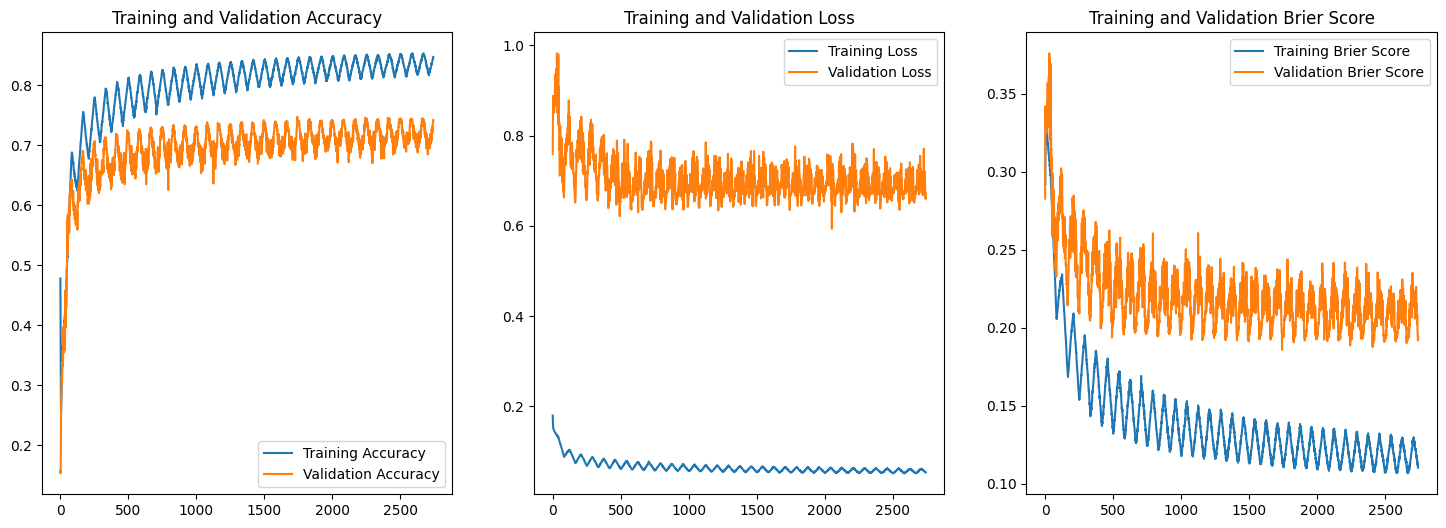

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

brier_score = history.history['brier_score']
val_brier_score = history.history['val_brier_score']


epochs_range = range(2743)
# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar Accuracy
axes[0].plot(epochs_range, acc, label='Training Accuracy')
axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axes[0].legend(loc='lower right')
axes[0].set_title('Training and Validation Accuracy')

# Graficar Loss
axes[1].plot(epochs_range, loss, label='Training Loss')
axes[1].plot(epochs_range, val_loss, label='Validation Loss')
axes[1].legend(loc='upper right')
axes[1].set_title('Training and Validation Loss')

# Graficar Brier Score
axes[2].plot(epochs_range, brier_score, label='Training Brier Score')
axes[2].plot(epochs_range, val_brier_score, label='Validation Brier Score')
axes[2].legend(loc='upper right')
axes[2].set_title('Training and Validation Brier Score')

plt.show()

In [42]:
test_loss, test_accuracy, test_brier_score = model.evaluate(
    X_test, y_test)

4234/4234 [==============================] - 3s 671us/step - loss: 0.6340 - brier_score: 0.1865 - accuracy: 0.7455


In [51]:
X_test[1]

array([ 1.39749661,  0.28597382, -0.55628111,  1.58972772,  5.18458914,
       -0.11406946,  0.4341341 ,  0.72537923, -0.06032554, -0.47569163,
       -0.37857859,  0.27615877, -0.30224348, -0.06517068, -0.13887806,
       -1.00115472,  0.57727724,  0.93139467,  1.20080723,  1.27880368,
       -0.90815693, -0.20670061, -0.31098692, -0.36144963, -0.52903524,
       -0.28378785, -0.3465166 , -0.04681387, -0.33662367, -0.17584319,
       -0.28923412, -0.22022077, -0.59427028, -0.42281632,  0.23654629,
       -0.21306725, -0.87061195,  1.58292372,  0.58839875, -0.60858016,
       -0.01898725,  0.05158652, -0.08456537, -1.55444565, -0.66067558,
       -0.99866119,  1.4167914 ,  0.11924717,  1.23983838, -0.15249195,
       -0.059876  ,  1.34088244,  2.01147186, -0.14493599, -0.39388176,
       -0.25221884,  1.52130001, -0.35882445, -0.04486102, -0.76743516,
       -0.20027828,  0.29289476, -0.65466805, -0.09886963,  0.2856049 ,
        0.86104662,  0.04079795, -0.37872055, -0.29010043,  0.65

In [60]:
indices_of_zero = y_test[y_test == 0.0].index
print(np.sum(y_test == 0)/np.sum(y_test ==1))
print(np.sum(y_test == 0))

0.17472924813790353
20151


In [45]:
y_test[131456]

0.0

In [55]:
from sklearn.metrics import confusion_matrix

# Supongamos que tenemos las siguientes predicciones y etiquetas verdaderas para el conjunto de test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

4234/4234 [==============================] - 3s 614us/step


array([[12446,  7705],
       [26774, 88553]], dtype=int64)

# Guardamos datos accuracy y loss

In [48]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../Modelos enternados/history_final.csv', index=False)

# Guardamos el modelo

In [49]:
path_to_save = '../../Modelos enternados/'

In [50]:
model.save(path_to_save + 'Modelo_final.h5')